In [2]:
#import functions
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

#for in notebook graphic exploration
%matplotlib inline

In [3]:
#data loading
df = pd.read_csv('1000CharSimulated.csv', index_col=0) #Setting index_col at 0 cleans up DF

In [4]:
df.head()

,RollType,strength,dexterity,constituion,intellegence,wisdom,charisma,str mod,dex mod,con mod,int mod,wis mod,char mod
0,3D6,12,8,7,16,17,12,1,-1,-2,3,3,1
1,3D6,11,9,17,11,4,10,0,-1,3,0,-3,0
2,3D6,6,10,8,9,8,9,-2,0,-1,-1,-1,-1
3,3D6,8,9,14,12,16,13,-1,-1,2,1,3,1
4,3D6,11,11,11,13,11,11,0,0,0,1,0,0


In [5]:
df.tail(10)

,RollType,strength,dexterity,constituion,intellegence,wisdom,charisma,str mod,dex mod,con mod,int mod,wis mod,char mod
2990,Colville,16,14,12,10,15,16,3,2,1,0,2,3
2991,Colville,18,11,10,18,10,14,4,0,0,4,0,2
2992,Colville,13,11,13,9,16,15,1,0,1,-1,3,2
2993,Colville,14,16,11,9,15,11,2,3,0,-1,2,0
2994,Colville,12,18,13,14,12,16,1,4,1,2,1,3
2995,Colville,13,13,9,9,15,15,1,1,-1,-1,2,2
2996,Colville,16,9,15,12,16,10,3,-1,2,1,3,0
2997,Colville,15,14,17,15,14,10,2,2,3,2,2,0
2998,Colville,12,17,8,15,10,17,1,3,-1,2,0,3
2999,Colville,11,9,16,15,14,15,0,-1,3,2,2,2


Bullet Points:
-Been watching "Running the Game" and appreciating the art of creating a collective narrative
-But also have been interested in data analysis and programming
-To get better at both, want to combine them 

Created a script that generated stats three different ways
-roll 3d6
-roll 4d6 (dropping lowest value)
-roll 4d6 AND two stats have to >= 15 (Matt Colville Method)

Matt says he likes this method because it helps players discover their characters.  But, also having 2 stats greater than 15 ensures that they are special in some one.  That they are heros and have something that makes them unique.  So main question is, how much better are Matt's generated characters than the other methods? 

Other questions (I'm interested in and will help me learn data exploration)

Main: How much better are Matt's characters than other characters?

Other:
-What is the correlation between stats (holding RollType constant)?  Should be zero, but want to make sure.  
-How about correlation between ability and ability modifier?
-Who was the strongest character generated?  The weakest?
-Could I create an if statement mapping stats to the class the character should be?  

In [6]:
df['ability_average']=df.iloc[:,1:7].mean(axis=1)
df['mod_average']=df.iloc[:,7:12].mean(axis=1)
#pd.mean(axis = 1) if 0 avearge down rows, if 1, average across columns 

In [7]:
df.sample(5) #sample is cool because it randomly grabs however many data points you request

,RollType,strength,dexterity,constituion,intellegence,wisdom,charisma,str mod,dex mod,con mod,int mod,wis mod,char mod,ability_average,mod_average
2235,Colville,15,9,5,15,12,12,2,-1,-3,2,1,1,11.333333,0.2
2169,Colville,9,13,16,8,11,15,-1,1,3,-1,0,2,12.000000,0.4
894,3D6,14,11,12,13,10,13,2,0,1,1,0,1,12.166667,0.8
2250,Colville,13,15,16,13,10,9,1,2,3,1,0,-1,12.666667,1.4
76,3D6,9,10,12,6,8,15,-1,0,1,-2,-1,2,10.000000,-0.6


In [8]:
df.describe()

,strength,dexterity,constituion,intellegence,wisdom,charisma,str mod,dex mod,con mod,int mod,wis mod,char mod,ability_average,mod_average
count,3000.000000,3000.000000,3000.000000,3000.000000,3000.000000,3000.000,3000.000000,3000.000000,3000.000000,3000.000000,3000.000000,3000.000000,3000.000000,3000.000000
mean,11.940000,11.873000,11.895333,11.882333,11.947000,11.964,0.720667,0.684667,0.694667,0.683000,0.715667,0.735667,11.916944,0.699733
std,3.107778,3.174518,3.092070,3.118824,3.109997,3.139,1.567841,1.611448,1.565542,1.578187,1.567899,1.582602,1.546388,0.824710
min,3.000000,3.000000,3.000000,3.000000,3.000000,3.000,-4.000000,-4.000000,-4.000000,-4.000000,-4.000000,-4.000000,6.500000,-2.200000
25%,10.000000,10.000000,10.000000,10.000000,10.000000,10.000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,10.833333,0.200000
50%,12.000000,12.000000,12.000000,12.000000,12.000000,12.000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,12.166667,0.800000
75%,14.000000,14.000000,14.000000,14.000000,14.000000,14.000,2.000000,2.000000,2.000000,2.000000,2.000000,2.000000,13.166667,1.200000
max,18.000000,18.000000,18.000000,18.000000,18.000000,18.000,4.000000,4.000000,4.000000,4.000000,4.000000,4.000000,15.833333,2.800000


In [9]:
df.groupby(['RollType']).mean() #need to have groupby columns in [] otherwise throws an error
#df.groupby(['RollType']).std()

,strength,dexterity,constituion,intellegence,wisdom,charisma,str mod,dex mod,con mod,int mod,wis mod,char mod,ability_average,mod_average
RollType,,,,,,,,,,,,,,
3D6,10.480,10.457,10.419,10.458,10.556,10.582,-0.010,-0.029,-0.037,-0.026,0.030,0.057,10.492000,-0.0144
4D6DropLow,12.286,12.194,12.147,12.070,12.222,12.203,0.902,0.849,0.819,0.779,0.858,0.847,12.187000,0.8414
Colville,13.054,12.968,13.120,13.119,13.063,13.107,1.270,1.234,1.302,1.296,1.259,1.303,13.071833,1.2722


In [10]:
df[['RollType','strength','dexterity']].mean() # this works

strength     11.940
dexterity    11.873
dtype: float64

In [11]:
df[['RollType','strength','dexterity']].groupby('RollType').mean() # this works

,strength,dexterity
RollType,,
3D6,10.480,10.457
4D6DropLow,12.286,12.194
Colville,13.054,12.968


In [12]:
df[['RollType','strength','dexterity']].groupby('RollType').describe() # this works

dexterity                                                strength  \
               count    mean       std  min   25%   50%   75%   max    count   
RollType                                                                       
3D6           1000.0  10.457  3.069132  3.0   8.0  10.0  13.0  18.0   1000.0   
4D6DropLow    1000.0  12.194  2.844372  4.0  10.0  12.0  14.0  18.0   1000.0   
Colville      1000.0  12.968  3.071223  4.0  11.0  13.0  15.0  18.0   1000.0   

                                                           
              mean       std  min   25%   50%   75%   max  
RollType                                                   
3D6         10.480  2.973624  3.0   8.0  10.0  13.0  18.0  
4D6DropLow  12.286  2.855934  4.0  10.0  12.0  14.0  18.0  
Colville    13.054  2.915405  3.0  11.0  13.0  15.0  18.0

In [13]:
df.groupby('RollType').describe()

ability_average                                            \
                     count       mean       std       min        25%   
RollType                                                               
3D6                 1000.0  10.492000  1.221377  6.500000   9.666667   
4D6DropLow          1000.0  12.187000  1.181776  8.333333  11.500000   
Colville            1000.0  13.071833  0.921831  9.833333  12.500000   

                                            char mod         ...  wis mod  \
                  50%        75%        max    count   mean  ...      75%   
RollType                                                     ...            
3D6         10.500000  11.333333  14.500000   1000.0  0.057  ...      1.0   
4D6DropLow  12.166667  13.000000  15.333333   1000.0  0.847  ...      2.0   
Colville    13.166667  13.666667  15.833333   1000.0  1.303  ...      2.0   

                 wisdom                                                 
            max   count    mean       std  min   25%   50%   75%   max  
RollType                                                                
3D6         4.0  1000.0  10.556  2.902290  3.0   8.0  11.0  13.0  18.0  
4D6DropLow  4.0  1000.0  12.222  2.894321  3.0  10.0  12.0  14.0  18.0  
Colville    4.0  1000.0  13.063  2.995998  4.0  11.0  13.0  15.0  18.0  

[3 rows x 112 columns]

RollType
3D6           AxesSubplot(0.125,0.125;0.775x0.755)
4D6DropLow    AxesSubplot(0.125,0.125;0.775x0.755)
Colville      AxesSubplot(0.125,0.125;0.775x0.755)
Name: ability_average, dtype: object

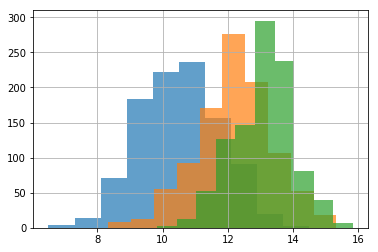

In [14]:
df.groupby('RollType').ability_average.hist(alpha=0.7)

RollType
3D6           AxesSubplot(0.125,0.125;0.775x0.755)
4D6DropLow    AxesSubplot(0.125,0.125;0.775x0.755)
Colville      AxesSubplot(0.125,0.125;0.775x0.755)
Name: ability_average, dtype: object

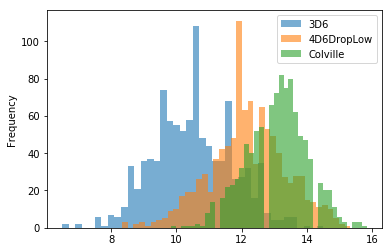

In [15]:
df.groupby('RollType').ability_average.plot(kind='hist',alpha=.6,legend=True,bins = 40)

In [16]:
df.groupby('RollType').max()

,strength,dexterity,constituion,intellegence,wisdom,charisma,str mod,dex mod,con mod,int mod,wis mod,char mod,ability_average,mod_average
RollType,,,,,,,,,,,,,,
3D6,18,18,18,17,18,18,4,4,4,3,4,4,14.500000,2.0
4D6DropLow,18,18,18,18,18,18,4,4,4,4,4,4,15.333333,2.6
Colville,18,18,18,18,18,18,4,4,4,4,4,4,15.833333,2.8


In [17]:
#Let's look at the best of the best for each d roll.  To do so, can filter for the max ability average
print(df[(df.RollType == '3D6') & (df.ability_average >= 14.5)])

print(df[(df.RollType == '4D6DropLow') & (df.ability_average >= 15.3)])

print(df[(df.RollType == 'Colville') & (df.ability_average >= 15.83)])


    RollType  strength  dexterity  constituion  intellegence  wisdom  \
577      3D6        16         13           17            15      13   

     charisma  str mod  dex mod  con mod  int mod  wis mod  char mod  \
577        13        3        1        3        2        1         1   

     ability_average  mod_average  
577             14.5          2.0  
        RollType  strength  dexterity  constituion  intellegence  wisdom  \
1866  4D6DropLow        18         15           13            16      16   

      charisma  str mod  dex mod  con mod  int mod  wis mod  char mod  \
1866        14        4        2        1        3        3         2   

      ability_average  mod_average  
1866        15.333333          2.6  
      RollType  strength  dexterity  constituion  intellegence  wisdom  \
2723  Colville        18         14           18            15      14   

      charisma  str mod  dex mod  con mod  int mod  wis mod  char mod  \
2723        16        4        2        4 

I've always been really bad at the above.  I feel like I always do it wrong.  So going to take some notes on indexing. 

<Brackets>

Columns

Can use brackets to select a column in the data frame.

df['strength'] -> Give you the strength column

df[ ['strength','wisdom'] ] -> Gives you the strength AND wisdom columns
#above way it a little easier for me to understand.  Really highlights that I'm passing a list to the selection

For the above, you are passing a list ['strength','wisdom'], into the selection df[], which gives you both

Rows
df[:3] -> up in till index 3
df[3:8] -> from 3 to 7, the 2nd term is none inclusive
df[8:] -> 8 until the end

<iloc & loc>


Selecting Both - combine the above

df['strength'][:3]
df[ ['strength','wisdom'] ][3:8]

Order doesn't matter.  Because either selecting columns then rows, or rows, then columns


Can use
- iloc (positions of index)
- loc (labels of index)

loc takes 2 operaters seperated by a ",".  First one is row, 2nd is column.  So df.loc[:,"RollType"] would be all rows, for RollType Column

df.loc[startrow:endrow, startcolumn:endcolumn]




In [77]:
df.loc[0:10,'strength':'charisma']

,strength,dexterity,constituion,intellegence,wisdom,charisma
0,12,8,7,16,17,12
1,11,9,17,11,4,10
2,6,10,8,9,8,9
3,8,9,14,12,16,13
4,11,11,11,13,11,11
5,8,12,6,10,10,9
6,9,9,11,14,14,16
7,10,9,12,10,8,13
8,15,14,7,6,9,10
9,9,11,12,16,13,7


In [79]:
df.iloc[0:10,0:5]

,RollType,strength,dexterity,constituion,intellegence
0,3D6,12,8,7,16
1,3D6,11,9,17,11
2,3D6,6,10,8,9
3,3D6,8,9,14,12
4,3D6,11,11,11,13
5,3D6,8,12,6,10
6,3D6,9,9,11,14
7,3D6,10,9,12,10
8,3D6,15,14,7,6
9,3D6,9,11,12,16


In [40]:
df[ ['strength','wisdom'] ][3:8]

,strength,wisdom
3,8,16
4,11,11
5,8,10
6,9,14
7,10,8


In [82]:
df.columns
df.dtypes

RollType            object
strength             int64
dexterity            int64
constituion          int64
intellegence         int64
wisdom               int64
charisma             int64
str mod              int64
dex mod              int64
con mod              int64
int mod              int64
wis mod              int64
char mod             int64
ability_average    float64
mod_average        float64
dtype: object

Filtering with Boolean Indexes

df['RollType'] == '3D6'
df['RollType'][995:10005] == '3D6' # If I want to get fancy from above.  Selecting a column, than a row.  

Above is asking, is the RollType Column equal to 3D6?  True or False?

Then you pass this boolean expressions in () to the df and it only returns where the condition is true.

df[ (df['RollType'] == '3D6') ]
df[ (df['RollType'] == '3D6') ][995:1005]

df [ (df['RollType'] == '3D6') & (df[ability_average] == 12) ]



In [49]:
df[ (df['RollType'] == '3D6') ][995:1005] # doesn't give me rows 1000 on, because they are not true

,RollType,strength,dexterity,constituion,intellegence,wisdom,charisma,str mod,dex mod,con mod,int mod,wis mod,char mod,ability_average,mod_average
995,3D6,13,10,13,10,12,14,1,0,1,0,1,2,12.000000,0.6
996,3D6,11,7,11,9,15,9,0,-2,0,-1,2,-1,10.333333,-0.2
997,3D6,10,7,13,14,14,14,0,-2,1,2,2,2,12.000000,0.6
998,3D6,12,9,10,17,9,9,1,-1,0,3,-1,-1,11.000000,0.4
999,3D6,12,9,7,8,10,8,1,-1,-2,-1,0,-1,9.000000,-0.6


In [67]:
#Use filtering to identify which rows might be good if you wanted to play a certain character

#Using Colville's method lets find who might be a good monk.  Someone with high wisdom and dex.  Because Colville's method says
#need to have two stats 15 or greater, we can find the best monk characters with filtering
df[(df['RollType'] == 'Colville') & (df['dexterity'] >= 17) & (df['wisdom'] >= 17)]

,RollType,strength,dexterity,constituion,intellegence,wisdom,charisma,str mod,dex mod,con mod,int mod,wis mod,char mod,ability_average,mod_average
2363,Colville,10,18,12,18,17,9,0,4,1,4,3,-1,14.000000,2.4
2374,Colville,12,17,12,14,17,15,1,3,1,2,3,2,14.500000,2.0
2526,Colville,15,17,16,14,17,10,2,3,3,2,3,0,14.833333,2.6
2878,Colville,10,18,12,14,18,12,0,4,1,2,4,1,14.000000,2.2
2940,Colville,11,17,14,14,17,14,0,3,2,2,3,2,14.500000,2.0
2973,Colville,11,17,11,7,18,14,0,3,0,-2,4,2,13.000000,1.0


In [74]:
df[(df.loc[:,'RollType'] == 'Colville') & (df.loc[:,'wisdom'] >= 17) & (df.loc[:,'dexterity'] >= 17)]

,RollType,strength,dexterity,constituion,intellegence,wisdom,charisma,str mod,dex mod,con mod,int mod,wis mod,char mod,ability_average,mod_average
2363,Colville,10,18,12,18,17,9,0,4,1,4,3,-1,14.000000,2.4
2374,Colville,12,17,12,14,17,15,1,3,1,2,3,2,14.500000,2.0
2526,Colville,15,17,16,14,17,10,2,3,3,2,3,0,14.833333,2.6
2878,Colville,10,18,12,14,18,12,0,4,1,2,4,1,14.000000,2.2
2940,Colville,11,17,14,14,17,14,0,3,2,2,3,2,14.500000,2.0
2973,Colville,11,17,11,7,18,14,0,3,0,-2,4,2,13.000000,1.0


In [24]:
#so the below do the same thing
print(df[(df.RollType == '3D6') & (df.ability_average >= 14.5)])
print(df[(df.loc[:,"RollType"]=="3D6") & (df.loc[:,"ability_average"] >= 14.5)])

    RollType  strength  dexterity  constituion  intellegence  wisdom  \
577      3D6        16         13           17            15      13   

     charisma  str mod  dex mod  con mod  int mod  wis mod  char mod  \
577        13        3        1        3        2        1         1   

     ability_average  mod_average  
577             14.5          2.0  


In [76]:
df.wisdom.dexterity

AttributeError: 'Series' object has no attribute 'dexterity'

In [46]:
#Your strongest characters
df.loc[[577,1866,2723],:] #specic rows, all columns

,RollType,strength,dexterity,constituion,intellegence,wisdom,charisma,str mod,dex mod,con mod,int mod,wis mod,char mod,ability_average,mod_average
577,3D6,16,13,17,15,13,13,3,1,3,2,1,1,14.500000,2.0
1866,4D6DropLow,18,15,13,16,16,14,4,2,1,3,3,2,15.333333,2.6
2723,Colville,18,14,18,15,14,16,4,2,4,2,2,3,15.833333,2.8


In [47]:
df.groupby('RollType').min()

,strength,dexterity,constituion,intellegence,wisdom,charisma,str mod,dex mod,con mod,int mod,wis mod,char mod,ability_average,mod_average
RollType,,,,,,,,,,,,,,
3D6,3,3,3,3,3,3,-4,-4,-4,-4,-4,-4,6.500000,-2.2
4D6DropLow,4,4,3,3,3,3,-3,-3,-4,-4,-4,-4,8.333333,-1.2
Colville,3,4,4,3,4,4,-4,-3,-3,-4,-3,-3,9.833333,-0.8


In [49]:
#Let's look at the best of the best for each d roll.  To do so, can filter for the max ability average
print(df[(df.RollType == '3D6') & (df.ability_average <= 6.5)])

print(df[(df.RollType == '4D6DropLow') & (df.ability_average <= 8.4)])

print(df[(df.RollType == 'Colville') & (df.ability_average <= 10)])

    RollType  strength  dexterity  constituion  intellegence  wisdom  \
182      3D6        10          8            6             6       5   

     charisma  str mod  dex mod  con mod  int mod  wis mod  char mod  \
182         4        0       -1       -2       -2       -3        -3   

     ability_average  mod_average  
182              6.5         -1.6  
        RollType  strength  dexterity  constituion  intellegence  wisdom  \
1228  4D6DropLow         6          9            6            10       9   

      charisma  str mod  dex mod  con mod  int mod  wis mod  char mod  \
1228        10       -2       -1       -2        0       -1         0   

      ability_average  mod_average  
1228         8.333333         -1.2  
      RollType  strength  dexterity  constituion  intellegence  wisdom  \
2264  Colville        15         15            9             5       9   

      charisma  str mod  dex mod  con mod  int mod  wis mod  char mod  \
2264         6        2        2       -1 

In [50]:
#Your strongest characters
df.loc[[182,1228,2264],:]

,RollType,strength,dexterity,constituion,intellegence,wisdom,charisma,str mod,dex mod,con mod,int mod,wis mod,char mod,ability_average,mod_average
182,3D6,10,8,6,6,5,4,0,-1,-2,-2,-3,-3,6.500000,-1.6
1228,4D6DropLow,6,9,6,10,9,10,-2,-1,-2,0,-1,0,8.333333,-1.2
2264,Colville,15,15,9,5,9,6,2,2,-1,-3,-1,-2,9.833333,-0.2


In [96]:
df['strength'].hist(by = 'RollType',alpha=0.7,bins = 15)

KeyError: 'RollType'